In [17]:
# Plot 6.0 speed for 15 people
import numpy as np
import os
import pandas as pd
#cleaned data path needs to be given here
#profiles = os.listdir(PATH)
import matplotlib.pyplot as plt
from IPython.display import clear_output
import ast
from scipy.signal import find_peaks

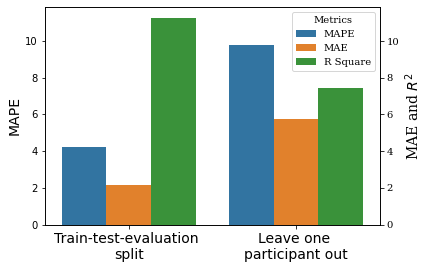

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

columns = ["Models", "MAPE", "MAE", "R Square"]
test_data = pd.DataFrame.from_records([("Train-test-evaluation \nsplit", 4.2,0.18, 0.94),("Leave one \nparticipant out", 9.8, 0.48, 0.62)],
                                          columns=columns)

test_data_melted = pd.melt(test_data, id_vars=columns[0],\
                           var_name="Metrics", value_name="value_numbers")

# Scale the data, just a simple example of how you might determine the scaling
mask = test_data_melted.Metrics.isin(["MAE", "R Square"])
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
test_data_melted.loc[mask, 'value_numbers'] = test_data_melted.loc[mask, 'value_numbers']*scale

# Plot 
fig, ax1 = plt.subplots()
plt.rcParams["font.family"] = "serif"

g = sns.barplot(x=columns[0], y="value_numbers", hue="Metrics",\
                data=test_data_melted, ax=ax1)
plt.xlabel('')

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('MAPE', fontsize=14)
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
ax2.set_ylabel('MAE and $R^2$',fontsize = 14)
#plt.title('Results of Convolution Neural Networks')
#plt.grid(alpha = 0.9)
plt.savefig('Grouped_bar.pdf')
plt.show()
%matplotlib inline

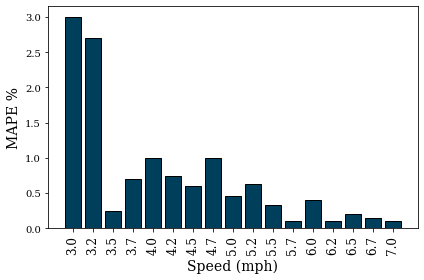

In [19]:
#Error bar graph for cadence

data = [['3.0',3],['3.2',2.7],['3.5',0.25],['3.7',0.7],
        ['4.0',1],['4.2',0.75],['4.5',0.6],['4.7',1],
        ['5.0',0.46],['5.2',0.63],['5.5',0.33],['5.7',0.1],
        ['6.0',0.4],['6.2',0.11],['6.5',0.2],['6.7',0.15],
        ['7.0',0.1]]
data_df = pd.DataFrame(data, columns = ['speed','error'])
#data_df['speed'] = [float(x) for x in data_df['speed']]
#plt.figure(figsize = (10,10))

plt.bar(data_df.speed,data_df.error, color = '#003f5c',edgecolor='black', align = 'center')
plt.ylabel("MAPE %", fontsize = 14)
plt.xlabel("Speed (mph)", fontsize = 14)
plt.xticks(list(data_df['speed']), fontsize = 12)


#plt.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.tick_params(axis = 'x', labelrotation = 90)
plt.tight_layout()
plt.savefig('Cadence_error.pdf')
plt.show()

%matplotlib inline


ValueError: Dimensions of labels and X must be compatible

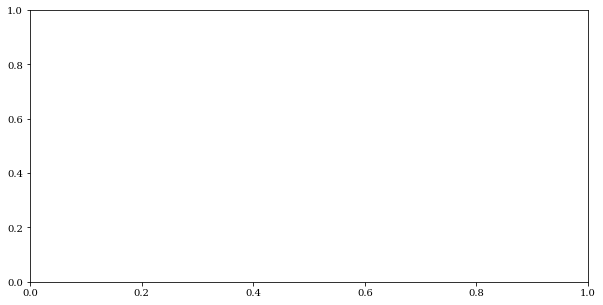

In [20]:
color = 'black'
group_df = plotdf.groupby(by='True')
box_data = list()
box_labels = list()



for group in group_df.groups.keys():
    Test_group = group_df.get_group(group)
    box_data.append(list(Test_group['Error']))
    
    box_labels.append(group)

    
plt.figure(figsize= (10,5))
plt.boxplot(box_data,labels=box_labels)
plt.tight_layout()

plt.xticks( fontsize = 13, weight = 12, color = color)


plt.yticks(np.linspace(-2,4,7),  fontsize = 13, weight = 12, color = color)
plt.xlabel('Speeds', color = color, fontsize = 18)
plt.ylabel('Error in Predictions', color = color, fontsize = 18)
plt.title('Boxplot for Error in predictions', color = color, fontsize = 18)
plt.grid()

#plt.savefig('Figure1.5.pdf')
plt.show()
%matplotlib inline

In [21]:
plotdf['PersonID']=plotdf['person_ID']

KeyError: 'person_ID'

ValueError: Dimensions of labels and X must be compatible

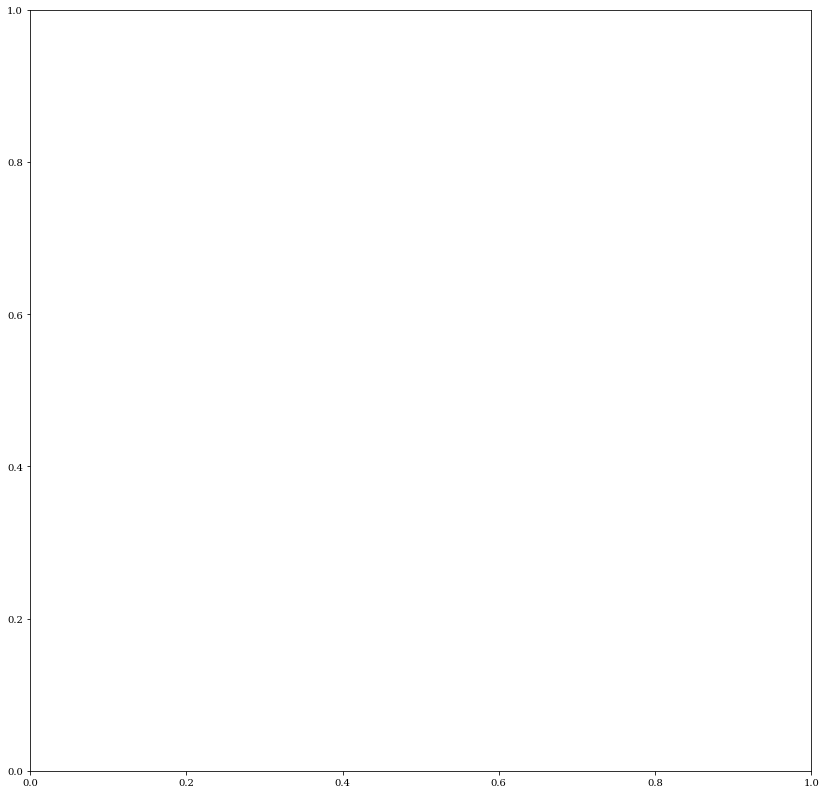

In [22]:

group_df = plotdf.groupby(by='PersonID')
box_data = list()
box_labels = list()

for group in group_df.groups.keys():
    Test_group = group_df.get_group(group)
    box_data.append(list(Test_group['Error']))
    
    box_labels.append(group)

plt.figure(figsize= (14,14))
plt.boxplot(box_data,labels=box_labels)
plt.xticks( fontsize = 13, weight = 12, color = 'red')


plt.yticks(np.linspace(-2,4,7),  fontsize = 13, weight = 12, color = 'red')
plt.xlabel('Person ID', color = 'red', fontsize = 18)
plt.ylabel('Error in Predictions', color = 'red', fontsize = 18)
plt.title('Boxplot for Error in predictions', color = 'red', fontsize = 18)
plt.savefig('Figure1.5.pdf')
plt.show()
%matplotlib inline

In [3]:
plotdf['Error'] = plotdf['True'] - plotdf['Predictions']

NameError: name 'plotdf' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(list(plotdf['True']), list(plotdf.Predictions))

In [4]:
#from sklearn.metrics import r2_score
plotdf = pd.DataFrame(columns = ['PersonID', 'True', 'Predictions'])
def get_vals(i,person):    
    model = build_cnn_model5()
    model.load_weights('/media/devesh/Daataa/HAI_NN_models/One_Person/model_5/{}.h5'.format(person))
    Features_Train,Labels_Train, Features_Test,Labels_Test = Dataset_Leave_Person(150,50,person)
    data = np.hstack(( np.full(fill_value = i,
                               shape = len(Labels_Test)).reshape(-1,1),
                      Labels_Test, 
                      model.predict(Features_Test)))

    tempdf = pd.DataFrame(data = data,
                          columns = ['person_ID', 'True', 'Predictions'])

    return tempdf

scores = list()
for i,person in enumerate(os.listdir('Cardio_Data/Cleaned_data')):
    print(i, person)
    clear_output(wait=True)
    plotdf = plotdf.append(get_vals(i,person))
    #scores.append(get_sklearn_scores(person))

FileNotFoundError: [Errno 2] No such file or directory: 'Cardio_Data/Cleaned_data'

In [ ]:
class StandardScaler:
    def __init__(self):
        self.train_mean = {'x':np.nan ,'y':np.nan, 'z':np.nan,
                          'gx':np.nan ,'gy':np.nan, 'gz':np.nan}
        self.train_std = {'x':np.nan ,'y':np.nan, 'z':np.nan,
                         'gx':np.nan ,'gy':np.nan, 'gz':np.nan}
        
    def fit(self,train_Features):
        #print(train_Features)
        self.train_mean['x'] = np.mean([f[0] for f in train_Features])
        self.train_mean['y'] = np.mean([f[1] for f in train_Features])
        self.train_mean['z'] = np.mean([f[2] for f in train_Features])
        
        self.train_std['x'] = np.std([f[0] for f in train_Features])
        self.train_std['y'] = np.std([f[1] for f in train_Features])
        self.train_std['z'] = np.std([f[2] for f in train_Features])
        
        self.train_mean['gx'] = np.mean([f[3] for f in train_Features])
        self.train_mean['gy'] = np.mean([f[4] for f in train_Features])
        self.train_mean['gz'] = np.mean([f[5] for f in train_Features])
        
        self.train_std['gx'] = np.std([f[3] for f in train_Features])
        self.train_std['gy'] = np.std([f[4] for f in train_Features])
        self.train_std['gz'] = np.std([f[5] for f in train_Features])
        
    def transform(self, Features):
        F_X = ([f[0] for f in Features] - self.train_mean['x'])/self.train_std['x']
        F_Y = ([f[1] for f in Features] - self.train_mean['y'])/self.train_std['y']
        F_Z = ([f[2] for f in Features] - self.train_mean['z'])/self.train_std['z']
        F_GX = ([f[3] for f in Features] - self.train_mean['gx'])/self.train_std['gx']
        F_GY = ([f[4] for f in Features] - self.train_mean['gy'])/self.train_std['gy']
        F_GZ = ([f[5] for f in Features] - self.train_mean['gz'])/self.train_std['gz']
        
        Features = np.array(list(zip(F_X,F_Y,F_Z,F_GX,F_GY,F_GZ)))

        return Features

In [5]:
''' 

                                 ##### Make_Dataset #####

@args : None
@Returns (Features and Labels) of dimensions specified in next cell

Features : X Y Z axis concatenated together

Labels : Speed of each sample

Inputs : 1) Frame Size : size of the sliding window
         2) Overlap Percentage : percentage of overlap desired in each sliding frame
        
In function variables : 1) instances : Total no of frames that can be achieved
                        2) start_index : defines start of each sliding frame
                        3) end_index : defines end of each sliding frame
                        
Calculation :   1) instances = (Total Length(1535) - Frame_Length) / (Frame_Length(1 - Overlap_percent))
                
                2) For each Frame,
                   start_index = end_index - (Frame_size*overlap_percent)
                   end_index = start_index + Frame_size
                
                   Feature = X + Y + Z

'''

def Make_Dataset(Frame_size, overlap_percent):
    Features = list()
    Labels = list()
    
    count = 0

    attriutes = ['Accel_LN_X_CAL','Accel_LN_Y_CAL','Accel_LN_Z_CAL', 
                 'Gyro_X_CAL','Gyro_Y_CAL','Gyro_Z_CAL']
            
    instances = int(math.floor((1535 - Frame_size) / (Frame_size*(1 - overlap_percent/100))))
    print(instances)
    PATH = 'Cardio_Data/Cleaned_data'
    profiles = os.listdir(PATH)

    for profile in profiles:
        speeds = os.listdir(PATH + '/' + profile)
        speeds = [s for s in speeds if float(s[:-4]) < 7.1]
        speeds = [s for s in speeds if float(s[:-4]) > 2.9]

        #speeds = [speed for speed in speeds if float(speed[0])<6]
        for speed in speeds:    
            
            #Read the csv file using pandas
            df = pd.read_csv(PATH + '/' + profile + '/' + speed)
            
            #Get label for this speed
            Label = float(re.sub('\.csv$', '', speed))
            
            
            start_index = 0 
            end_index = Frame_size
            #instances = 18
            for i in range(instances):
                
                feat_x = np.array(df[attriutes[0]][start_index:end_index]).reshape(-1,1)
                feat_y = np.array(df[attriutes[1]][start_index:end_index]).reshape(-1,1)
                feat_z = np.array(df[attriutes[2]][start_index:end_index]).reshape(-1,1)
                feat_gx = np.array(df[attriutes[3]][start_index:end_index]).reshape(-1,1)
                feat_gy = np.array(df[attriutes[4]][start_index:end_index]).reshape(-1,1)
                feat_gz = np.array(df[attriutes[5]][start_index:end_index]).reshape(-1,1)
                
                start_index = end_index - int(Frame_size*overlap_percent/100)
                end_index = start_index + Frame_size
                # Build array of features
               # print('Person : {} , Speed : {} , Start_index : {} , End_index : {}'.format(profile, speed[0:3],start_index,end_index))
                Feature = np.array([feat_x, feat_y, feat_z,
                                    feat_gx, feat_gy, feat_gz])
                
                Features.append((Feature))
                Labels.append(Label)
    
    return Features, Labels


'''
Train_Test_split for the data , 
default, test_size = 0.2

'''
def Split_Data(Features, Labels):
    
    #Train Test Split on data
    Features_Train, Features_Test, Labels_Train, Labels_Test = train_test_split(Features, Labels, shuffle = True, random_state = 42, test_size = 0.2)
    return(Features_Train, Features_Test, Labels_Train, Labels_Test)


def dataset_main(Frame_size,overlap_percent):
    #Frame_size = int(input(" Enter the Frame Size for the dataset, range(50, 1500) : "))
    #overlap_percent = float(input("Enter the percentage of overlap desired for the dataset range(0,100): "))

    Features, Labels = Make_Dataset(Frame_size,overlap_percent)
    Features = np.array(Features)

    Features_Train, Features_Test, Labels_Train, Labels_Test = Split_Data(Features, Labels)
    scaler = StandardScaler()
    scaler.fit(Features_Train)
    Features = scaler.transform(Features)

    Features_Train, Features_Test, Labels_Train, Labels_Test = Split_Data(Features, Labels)

    Labels_Train = np.array(Labels_Train).reshape(len(Labels_Train),1)
    print('Train Labels shape   : {}'.format(Labels_Train.shape))
    Features_Train = np.array(Features_Train)
   # print(Features_Train[0])
    print('Train Features shape : {}'.format(Features_Train.shape))

    Labels_Test = np.array(Labels_Test).reshape(len(Labels_Test),1)
    print('Test labels shape    : {}'.format(Labels_Test.shape))
    Features_Test = np.array(Features_Test)
    print('Test Features shape  : {}'.format(Features_Test.shape))
    return Features_Train,Labels_Train, Features_Test,Labels_Test
    

In [6]:
''' 

                                 ##### Leave one Person out #####

'''

def Dataset_Leave_Person(Frame_size, overlap_percent, test_profile):
    Features_Train = list()
    Labels_Train = list()
    Features_Test = list()
    Labels_Test = list()
    
    
    count = 0
    
    instances = int(math.floor((1535 - Frame_size) / (Frame_size*(1 - overlap_percent/100))))
    print(instances)
    PATH = 'Cardio_Data/Cleaned_data'
    profiles = os.listdir(PATH)
    for profile in profiles:
        speeds = os.listdir(PATH + '/' + profile)
        speeds = [s for s in speeds if float(s[:-4])<7.1]
        speeds = [s for s in speeds if float(s[:-4])>2.9]
        
        #print(speeds)
        #speeds = [speed for speed in speeds if float(speed[0])<6]

        attriutes = ['Accel_LN_X_CAL','Accel_LN_Y_CAL','Accel_LN_Z_CAL',
                        'Gyro_X_CAL','Gyro_Y_CAL','Gyro_Z_CAL']
     
            
        for speed in speeds:    
            
            #Read the csv file using pandas
            df = pd.read_csv(PATH + '/' + profile + '/' + speed)
            
            #Get label for this speed
            Label = float(re.sub('\.csv$', '', speed))
            
            
            start_index = 0 
            end_index = Frame_size
            #instances = 18
            for i in range(instances):
                
                feat_x = np.array(df[attriutes[0]][start_index:end_index]).reshape(-1,1)
                feat_y = np.array(df[attriutes[1]][start_index:end_index]).reshape(-1,1)
                feat_z = np.array(df[attriutes[2]][start_index:end_index]).reshape(-1,1)
                feat_gx = np.array(df[attriutes[3]][start_index:end_index]).reshape(-1,1)
                feat_gy = np.array(df[attriutes[4]][start_index:end_index]).reshape(-1,1)
                feat_gz = np.array(df[attriutes[5]][start_index:end_index]).reshape(-1,1)
                
                start_index = end_index - int(Frame_size*overlap_percent/100)
                end_index = start_index + Frame_size
                # Build array of features
               # print('Person : {} , Speed : {} , Start_index : {} , End_index : {}'.format(profile, speed[0:3],start_index,end_index))
                Feature = np.array([feat_x, feat_y, feat_z,
                                    feat_gx, feat_gy, feat_gz])
                
                if profile ==test_profile:
                    Features_Test.append((Feature))
                    Labels_Test.append(Label)
                
                else:
                    Features_Train.append((Feature))
                    Labels_Train.append(Label)
            
    scaler = StandardScaler()
    scaler.fit(Features_Train)
    Features_Train = scaler.transform(Features_Train)
    Features_Test = scaler.transform(Features_Test)
    
    Labels_Train = np.array(Labels_Train).reshape(len(Labels_Train),1)
    print('Train Labels shape   : {}'.format(Labels_Train.shape))
    Features_Train = np.array(Features_Train)
    print('Train Features shape : {}'.format(Features_Train.shape))

    Labels_Test = np.array(Labels_Test).reshape(len(Labels_Test),1)
    print('Test labels shape    : {}'.format(Labels_Test.shape))
    Features_Test = np.array(Features_Test)
    print('Test Features shape  : {}'.format(Features_Test.shape))
    
    return Features_Train, Labels_Train,Features_Test,Labels_Test
    

In [7]:
def R_Square(y_true, y_pred):

    Num =  k.sum(k.square( y_true-y_pred ))
    print(Num)
    Denom = k.sum(k.square( y_true - k.mean(y_true) ) )
    print(Denom)
    R = 1 - (Num/(Denom + k.epsilon()))
    return R


def build_cnn_model5(LR=0.1,Frame_size=150):
    
    input1 = layers.Input(shape = (6,Frame_size,1))
    x1 = layers.Conv2D(filters = 27,kernel_size=(6,6),padding='same', activation='relu')(input1)
    
    x1 = layers.Dropout(0.4)(x1)

    x1 = layers.Conv2D(filters = 45,kernel_size=(6,6),padding='same', activation='relu')(x1)
    x11 = layers.GlobalMaxPool2D()(x1)
    

    
    next_one = layers.Dense(180, activation='relu')(x11)
    next_two = layers.Dropout(0.5)(next_one)
    next_three = layers.Dense(120, activation='relu')(next_two)
    next_four = layers.Dropout(0.3)(next_three)
    next_five = layers.Dense(30, activation='relu')(next_four)
    
    next_six = layers.Dense(1)(next_five)


    # from keras.models import Model
    model = tf.keras.Model(inputs = [input1], outputs = next_six)

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(optimizer = optimizer,
              loss='mean_absolute_error',
              metrics=['mae','mape',R_Square])
    return model

mods = build_cnn_model5()
mods.summary()


NameError: name 'layers' is not defined

In [23]:
#Importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as k
print(tf.__version__)
# Use seaborn for pairplot
#!pip install -q seaborn

# Use some functions from tensorflow_docs
#!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils.vis_utils import plot_model

from IPython.display import clear_output
import time

2.2.0


ModuleNotFoundError: No module named 'tensorflow_docs'

# Figure 5 - Error boxplots


In [ ]:
'''
Compare one step frequency of two people
input names,

go to particular directories,

Parameters:
-----------
   arg1 : names (list) 
         names to plot against.
        
   arg2 : win_start (integer) 
          Size of the window start.
        
   arg2 : win_start (integer) 
          Size of the window end.
          
Returns: 
-------
    axes : plt object
           to plot the graph

'''

def compare_fft(names, win_start, win_end):
    
    plot_data = list()
    for name in names:
        profile = 'Cardio_Data/Cleaned_data/{}/'.format(name)
        for speed in os.listdir(profile):
            
    
            Resultant_Accel = pd.read_csv(profile + speed)[win_start:win_end]

            Resultant_Accel['Resultant_Accel'] = np.sqrt(np.square(Resultant_Accel.Accel_LN_X_CAL)+
                                                        np.square(Resultant_Accel.Accel_LN_Y_CAL)+
                                                        np.square(Resultant_Accel.Accel_LN_Z_CAL))

            Resultant_Accel.Resultant_Accel = Resultant_Accel['Resultant_Accel'] - np.mean(Resultant_Accel['Resultant_Accel'])

            #AMPLITUDE
            signal = abs((np.fft.fft(Resultant_Accel['Resultant_Accel']) / len(Resultant_Accel))[range(int(len(Resultant_Accel['Resultant_Accel']) / 4))])
            #FREQUENCY
            signal1 = np.fft.fftfreq(len(Resultant_Accel['Resultant_Accel']),d=1 / 51.1)[range(int(len(Resultant_Accel['Resultant_Accel']) / 4))]


            ratio = 0
            max_freq_index = 0
            min_freq_index = 0
            peaks , _ = find_peaks(signal)
            peaks = np.array([p for p in peaks if (signal1[p] > 0.35) & (signal1[p] < 3.1)])
            status_df = pd.DataFrame(columns = ['Speed', 'Height', 'One_Step_Freq', 'Two_Step_Freq', 'One_Step_Amp', 'Two_Step_Amp', 'Ratio'])

            ###########################################
            higher_class_freqs = signal[peaks].argsort()[-1:]
            lower_class_freqs = signal[peaks].argsort()[-5:-1]
            select_freq_df = pd.DataFrame(columns=['Fh', 'Fl', 'ratio_index'])

            for Fh in higher_class_freqs:
                for Fl in lower_class_freqs:
                    if signal1[peaks[Fh]] < signal1[peaks[Fl]]:
                        ratio = signal1[peaks[Fl]] / signal1[peaks[Fh]]
                        select_freq_df = select_freq_df.append(
                            {'Fh': Fh, 'Fl': Fl, 'ratio_index': np.square(ratio - 2)}, ignore_index=True)
                    else:
                        ratio = signal1[peaks[Fh]] / signal1[peaks[Fl]]
                        select_freq_df = select_freq_df.append(
                            {'Fh': Fh, 'Fl': Fl, 'ratio_index': np.square(ratio - 2)}, ignore_index=True)

            select_freq_df = select_freq_df.sort_values(by='ratio_index')
            select_freq_df.reset_index(inplace=True, drop=True)
            top_two_peaks = list(select_freq_df[['Fh', 'Fl']].loc[0])
            top_two_peaks[0] = int(top_two_peaks[0])
            top_two_peaks[1] = int(top_two_peaks[1])

            #Compares the amplitude for choosing the top frequency
            # Now it is changed to frequency
            if signal1[peaks[top_two_peaks[0]]]<signal1[peaks[top_two_peaks[1]]]:
                ratio = signal1[peaks[top_two_peaks[1]]]/signal1[peaks[top_two_peaks[0]]]
                max_freq_index = peaks[top_two_peaks[1]]
                min_freq_index = peaks[top_two_peaks[0]]

            else:
                ratio = signal1[peaks[top_two_peaks[0]]]/signal1[peaks[top_two_peaks[1]]]
                max_freq_index = peaks[top_two_peaks[0]]
                min_freq_index = peaks[top_two_peaks[1]]
            #find argmax and argmin of two freuency and return corresponding index


            ratio = signal1[max_freq_index]/signal1[min_freq_index]
            status_dict = {#'Height':Data_Collection.Height.iloc[index],
                           #'Speed': float(group),
                           'Two_Step_Freq':signal1[min_freq_index],
                           'One_Step_Freq':signal1[max_freq_index],
                           'Two_Step_Amp' :signal[min_freq_index],
                           'One_Step_Amp' : signal[max_freq_index],
                           'Ratio': ratio}
            status_df = status_df.append(status_dict, ignore_index = True)

            #axs[j,i].set_xticks(np.round(np.linspace(0,4,12),1))
            #axs[j,i].set_yticks(np.round(np.linspace(0,4,12),1))


            status_df = status_df.append(status_dict, ignore_index = True)
            ################################################
           
            

            Fh = signal[peaks].argsort()[-1:]
            plot_data.append([name, speed, signal1[max_freq_index]])#signal1[peaks[Fh[0]]]])
            

    plot_df = pd.DataFrame(data = plot_data, columns = ['name','speed','freq'])

    return plot_df


In [ ]:
'''
For each perosn see the highes amplitude 

'''
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

names = ['Sudeep','Devesh']

multiples = [5,10,15,30]


names = ['Neha', 'Krithin','Sudeep']
win_start = 0
win_end = 1535
DataCollection = pd.read_csv('Cardio_Data/DataCollection.csv').set_index('Name',drop=True).to_dict()
plot_df = compare_fft(names, win_start, win_end)
plot_df['speed'] = list(map(lambda x: float(x[:-4]),plot_df['speed']))
plot_df.sort_values(by = 'speed', inplace = True)

plot_df = plot_df[(plot_df['speed']<7.1)&(plot_df['speed']>2.9)]
group_df = plot_df.groupby('name')
colors = ['#d95f02','#1b9e77','#7570b3']
plt.figure(figsize=(9,3))
plt.yticks(fontsize = 12)

for i,name in enumerate(names):
    plt.plot(group_df.get_group(name)['speed'],group_df.get_group(name)['freq'], color = colors[i])
    plt.scatter(group_df.get_group(name)['speed'],group_df.get_group(name)['freq'], 
             label = str(int(DataCollection['Height'][name])) + ' cms', marker = 'o', color = colors[i], s = 50)
plt.legend(loc ='lower right',title = 'Participant height',fancybox = True)
    
plt.xticks(fontsize = 12)

#plt.title('One Step Frequency of 3 people using 30 seconds of data', fontsize = 14)
plt.ylabel('Step frequency (Hz)', fontsize = 14)
# fig.set_size_inches(w=18,h=3)
plt.tick_params(labelleft=True, labelright=True)
plt.xlabel('Speed (mph)', fontsize = 14)
plt.grid(axis ='y')

plt.yticks(fontsize = 12)

plt.tight_layout()
plt.savefig('Compare_Cadence.pdf')
plt.show()
%matplotlib inline

In [24]:
higher_class_freqs = signal[peaks].argsort()[-1:]
lower_class_freqs = signal[peaks].argsort()[-5:-1]
select_freq_df = pd.DataFrame(columns=['Fh', 'Fl', 'ratio_index'])

for Fh in higher_class_freqs:
    for Fl in lower_class_freqs:
        if signal1[peaks[Fh]] < signal1[peaks[Fl]]:
            ratio = signal1[peaks[Fl]] / signal1[peaks[Fh]]
            select_freq_df = select_freq_df.append(
                {'Fh': Fh, 'Fl': Fl, 'ratio_index': np.square(ratio - 2)}, ignore_index=True)
        else:
            ratio = signal1[peaks[Fh]] / signal1[peaks[Fl]]
            select_freq_df = select_freq_df.append(
                {'Fh': Fh, 'Fl': Fl, 'ratio_index': np.square(ratio - 2)}, ignore_index=True)

select_freq_df = select_freq_df.sort_values(by='ratio_index')
select_freq_df.reset_index(inplace=True, drop=True)
top_two_peaks = list(select_freq_df[['Fh', 'Fl']].loc[0])
top_two_peaks[0] = int(top_two_peaks[0])
top_two_peaks[1] = int(top_two_peaks[1])

#Compares the amplitude for choosing the top frequency
# Now it is changed to frequency
if signal1[peaks[top_two_peaks[0]]]<signal1[peaks[top_two_peaks[1]]]:
    ratio = signal1[peaks[top_two_peaks[1]]]/signal1[peaks[top_two_peaks[0]]]
    max_freq_index = peaks[top_two_peaks[1]]
    min_freq_index = peaks[top_two_peaks[0]]

else:
    ratio = signal1[peaks[top_two_peaks[0]]]/signal1[peaks[top_two_peaks[1]]]
    max_freq_index = peaks[top_two_peaks[0]]
    min_freq_index = peaks[top_two_peaks[1]]
#find argmax and argmin of two freuency and return corresponding index


ratio = signal1[max_freq_index]/signal1[min_freq_index]
status_dict = {'Height':Data_Collection.Height.iloc[index],
               'Speed': float(group),
               'Two_Step_Freq':signal1[min_freq_index],
               'One_Step_Freq':signal1[max_freq_index],
               'Two_Step_Amp' :signal[min_freq_index],
               'One_Step_Amp' : signal[max_freq_index],
               'Ratio': ratio}
status_df = status_df.append(status_dict, ignore_index = True)

#axs[j,i].set_xticks(np.round(np.linspace(0,4,12),1))
#axs[j,i].set_yticks(np.round(np.linspace(0,4,12),1))


else:

status_dict = {'Height':Data_Collection.Height.iloc[index],
               'Speed': float(group),
               'Two_Step_Freq':np.nan,
               'One_Step_Freq':np.nan,
               'Two_Step_Amp': np.nan,
               'One_Step_Amp': np.nan,
               'Ratio': np.nan}
status_df = status_df.append(status_dict, ignore_index = True)


SyntaxError: invalid syntax (<ipython-input-24-68fe5f3583d6>, line 50)



# Contrasting two peoples one step frequencies


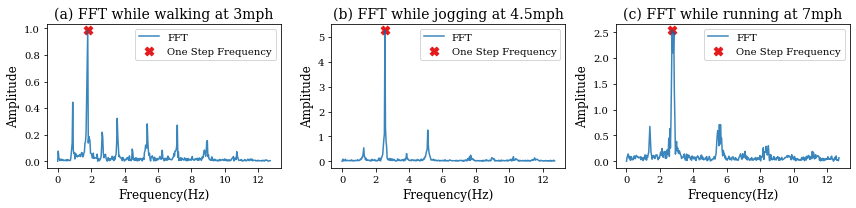

In [26]:
'''
For each perosn see the highes amplitude 

'''
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

status_df = pd.DataFrame(columns = ['Speed', 'Height', 'window_size','window_index','One_Step_Freq', 'Two_Step_Freq', 'One_Step_Amp', 'Two_Step_Amp', 'Ratio'])
names = ['Sudeep','Devesh']

multiples = [5,10,15,30]





fig, axs = plt.subplots(1,3)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) FFT while walking at 3mph',
               '(b) FFT while jogging at 4.5mph',
               '(c) FFT while running at 7mph']

sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']

colors1 = ['#e41a1c','#377eb8','#4daf4a']

colors = ['red','blue','green']




axs = axes_fft_plot(PATH,sub_Paths,sub_titles,axs)
fig.set_size_inches(w=12,h=3)
plt.tight_layout()

#plt.savefig('Figure1.3.pdf')
plt.show()
%matplotlib inline

In [28]:
def axes_fft_plot(PATH, sub_Paths,sub_titles,ax):
    for i, val in enumerate(sub_Paths):

        Resultant_Accel = pd.read_csv(PATH + val)[:1535]

        Resultant_Accel['Resultant_Accel'] = np.sqrt(np.square(Resultant_Accel.Accel_LN_X_CAL)+
                                                    np.square(Resultant_Accel.Accel_LN_Y_CAL)+
                                                    np.square(Resultant_Accel.Accel_LN_Z_CAL))

        Resultant_Accel.Resultant_Accel = Resultant_Accel['Resultant_Accel'] - np.mean(Resultant_Accel['Resultant_Accel'])

        #AMPLITUDE
        signal = abs((np.fft.fft(Resultant_Accel['Resultant_Accel']) / len(Resultant_Accel))[range(int(len(Resultant_Accel['Resultant_Accel']) / 4))])
        #FREQUENCY
        signal1 = np.fft.fftfreq(len(Resultant_Accel['Resultant_Accel']),d=1 / 51.1)[range(int(len(Resultant_Accel['Resultant_Accel']) / 4))]


        ratio = 0
        max_freq_index = 0
        min_freq_index = 0

        peaks , _ = find_peaks(signal)
       # peaks = np.array([p for p in peaks if (signal1[p] > 0.35) & (signal1[p] < 3.1)])


        higher_class_freqs = signal[peaks].argsort()[-1:]
        lower_class_freqs = signal[peaks].argsort()[-10:-1]
        select_freq_df = pd.DataFrame(columns = ['Fh','Fl','ratio_index'])

        for Fh in higher_class_freqs:
            for Fl in lower_class_freqs:
                if signal1[peaks[Fh]] < signal1[peaks[Fl]]:
                    ratio = signal1[peaks[Fl]] / signal1[peaks[Fh]]
                    select_freq_df = select_freq_df.append({'Fh':Fh, 'Fl':Fl, 'ratio_index':np.square(ratio - 2)}, ignore_index=True)
                else:
                    ratio = signal1[peaks[Fh]] / signal1[peaks[Fl]]
                    select_freq_df = select_freq_df.append({'Fh':Fh, 'Fl':Fl, 'ratio_index':np.square(ratio - 2)}, ignore_index=True)

        select_freq_df = select_freq_df.sort_values(by = 'ratio_index')
        select_freq_df.reset_index(inplace=True,drop=True)

        top_two_peaks = list(select_freq_df[['Fh','Fl']].loc[0])
        top_two_peaks[0] = int(top_two_peaks[0])
        top_two_peaks[1] = int(top_two_peaks[1])


        if signal1[peaks[top_two_peaks[0]]] < signal1[peaks[top_two_peaks[1]]]:
            ratio = signal1[peaks[top_two_peaks[1]]] / signal1[peaks[top_two_peaks[0]]]
            max_freq_index = peaks[top_two_peaks[1]]
            min_freq_index = peaks[top_two_peaks[0]]

        else:
            ratio = signal1[peaks[top_two_peaks[0]]] / signal1[peaks[top_two_peaks[1]]]
            max_freq_index = peaks[top_two_peaks[0]]
            min_freq_index = peaks[top_two_peaks[1]]


        ax[i].plot(signal1,signal, color = '#0868ac',label= 'FFT', alpha=0.8)

        ax[i].scatter(signal1[peaks[top_two_peaks[0]]],signal[peaks[top_two_peaks[0]]],marker = 'X',
                      s = 75,label = 'One Step Frequency',color = '#e41a1c')
        
        axs[i].set_xlabel('Frequency(Hz)', fontsize = 12)
        axs[i].set_ylabel('Amplitude', fontsize = 12)
        axs[i].set_title(sub_titles[i], fontsize = 14)
        axs[i].tick_params(labelsize = 10)    
        axs[i].legend(loc='upper right')
    return ax




# Plot the fast fourier response for the above speeds


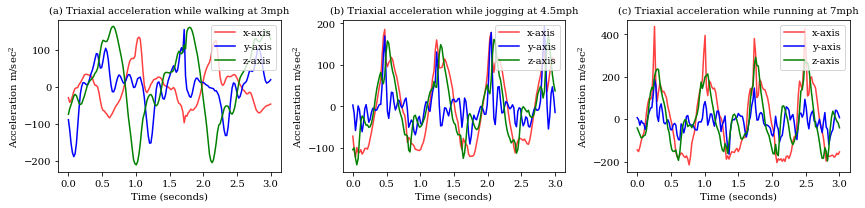

In [34]:
fig, axs = plt.subplots(1,3)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) Triaxial acceleration while walking at 3mph',
               '(b) Triaxial acceleration while jogging at 4.5mph',
               '(c) Triaxial acceleration while running at 7mph']

sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']

colors1 = ['#e41a1c','#377eb8','#4daf4a']

colors = ['red','blue','green']

accel = ['Accel_LN_X_CAL','Accel_LN_Y_CAL','Accel_LN_Z_CAL']
gyro = ['Gyro_X_CAL','Gyro_Y_CAL','Gyro_Z_CAL']
dev = gyro
for i, val in enumerate(sub_Paths):
    
    devesh_3 = pd.read_csv(PATH + val)[450:603]

    axs[i].plot(np.linspace(0,3,153),devesh_3[dev[0]],color=colors[0],label='x-axis',alpha = 0.75)
    axs[i].plot(np.linspace(0,3,153),devesh_3[dev[1]], color=colors[1],label='y-axis')
    axs[i].plot(np.linspace(0,3,153),devesh_3[dev[2]],color=colors[2], label='z-axis')
    axs[i].set_xlabel('Time (seconds)', fontsize = 10)
    axs[i].set_ylabel('Acceleration $\mathregular{m/sec^2}$', fontsize = 10)
    axs[i].set_title(sub_titles[i], fontsize = 10)
    axs[i].tick_params(labelsize = 10)    
    axs[i].legend(loc='upper right')
     
        
        
        
fig.set_size_inches(w=12,h=3)
plt.tight_layout()  

plt.savefig('Figure1.3.pdf')
plt.show()
%matplotlib inline

# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_X_CAL,color=colors[0],label='x-axis',alpha = 0.75)
# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Y_CAL, color=colors[1],label='y-axis')
# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Z_CAL,color=colors[2],label='z-axis')


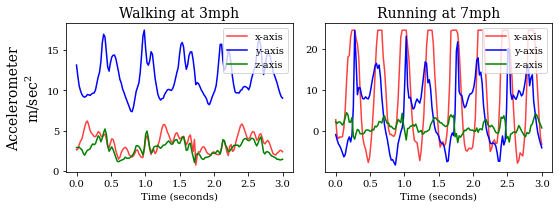

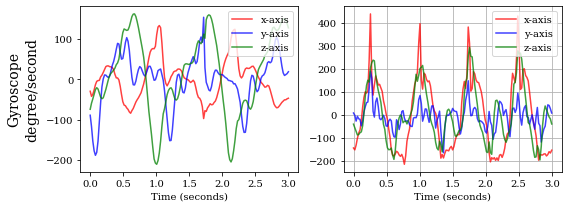

In [48]:
#fig, axs = plt.subplots(1,3)
fig, axs = plt.subplots(1,2)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) Triaxial acceleration while walking at 3mph',
             #  '(b) Triaxial acceleration while jogging at 4.5mph',
               '(c) Triaxial acceleration while running at 7mph']

#sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']
sub_Paths = ['3.0.csv','7.0.csv']

colors1 = ['#e41a1c','#377eb8','#4daf4a']

colors = ['red','blue','green']

for i, val in enumerate(sub_Paths):
    
    devesh_3 = pd.read_csv(PATH + val)[450:603]

    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_X_CAL,color=colors[0],label='x-axis',alpha = 0.75)
    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_Y_CAL, color=colors[1],label='y-axis')
    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_Z_CAL,color=colors[2], label='z-axis')
    axs[i].set_xlabel('Time (seconds)', fontsize = 10)
    axs[0].set_ylabel('Accelerometer\n$\mathregular{m/sec^2}$', fontsize = 14)
    #axs[i].set_title(sub_titles[i], fontsize = 10)
    axs[i].tick_params(labelsize = 10)    
    axs[i].legend(loc='upper right')
    axs[0].set_title('Walking at 3mph', fontsize = 14)
    axs[1].set_title('Running at 7mph', fontsize = 14)
        
        
        
fig.set_size_inches(w=8,h=3)
plt.tight_layout()  

#plt.savefig('Accelerometer.pdf')
plt.show()
%matplotlib inline


##################################################################

fig, axs = plt.subplots(1,2)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) Triaxial acceleration while walking at 3mph',
             #  '(b) Triaxial acceleration while jogging at 4.5mph',
               '(c) Triaxial acceleration while running at 7mph']

#sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']
sub_Paths = ['3.0.csv','7.0.csv']

colors1 = ['#e41a1c','#377eb8','#4daf4a']

colors = ['red','blue','green']

for i, val in enumerate(sub_Paths):
    
    devesh_3 = pd.read_csv(PATH + val)[450:603]

    axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_X_CAL,color=colors[0],label='x-axis',alpha = 0.75)
    axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Y_CAL, color=colors[1],label='y-axis',alpha = 0.75)
    axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Z_CAL,color=colors[2], label='z-axis',alpha = 0.75)
    axs[i].set_xlabel('Time (seconds)', fontsize = 10)
    axs[0].set_ylabel('Gyroscope\n$\mathregular{degree/second}$', fontsize = 14)
    axs[i].tick_params(labelsize = 10)    
    axs[i].legend(loc='upper right')
plt.grid()
     
        
        
        
fig.set_size_inches(w=8,h=3)
plt.tight_layout()  

#plt.savefig('Accelerometer.pdf')
plt.show()
%matplotlib inline

# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_X_CAL,color=colors[0],label='x-axis',alpha = 0.75)
# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Y_CAL, color=colors[1],label='y-axis')
# axs[i].plot(np.linspace(0,3,153),devesh_3.Gyro_Z_CAL,color=colors[2],label='z-axis')



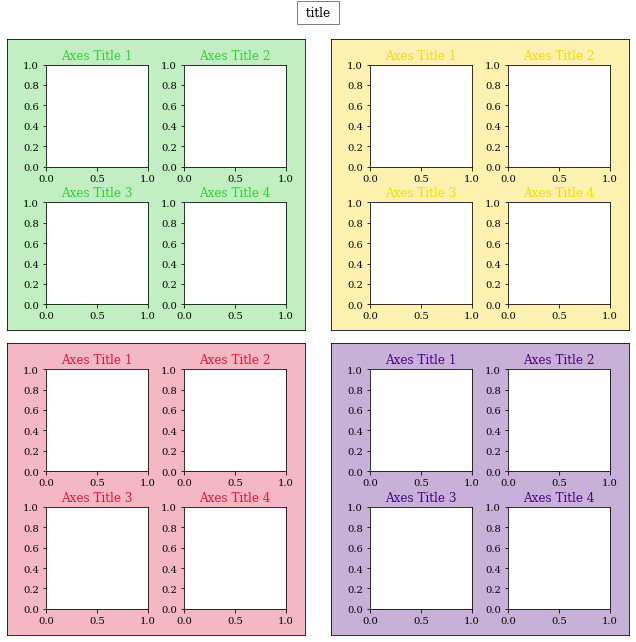

In [49]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9,9))
fig.suptitle(' title ', fontsize=12,
             bbox={'facecolor':'none', 'alpha':0.5, 'pad':5})

colors=["crimson", "indigo", "limegreen", "gold"]

for i in range(4):
    #outer
    outergs = gridspec.GridSpec(1, 1)
    outergs.update(bottom=(i//2)*.47+0.01,left=(i%2)*.5+0.02, 
                   top=(1+i//2)*.47-0.01,  right=(1+i%2)*.5-0.02)
    outerax = fig.add_subplot(outergs[0])
    outerax.tick_params(axis='both',which='both',bottom=0,left=0,
                        labelbottom=0, labelleft=0)
    outerax.set_facecolor(colors[i])
    outerax.patch.set_alpha(0.3)

    #inner
    gs = gridspec.GridSpec(2, 2)
    gs.update(bottom=(i//2)*.47+0.05,left=(i%2)*.5+0.08, 
                   top=(1+i//2)*.47-0.05,  right=(1+i%2)*.5-0.05,
                   wspace=0.35, hspace=0.35)
    for k in range(4):
        ax = fig.add_subplot(gs[k])
        ax.set_title('Axes Title {}'.format(k+1), color=colors[i])

plt.show()

In [ ]:
fig, axs = plt.subplots(1,3)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) Tri-axial acceleration while walking at 3mph',
               '(b) Tri-axial acceleration while jogging at 4.5mph',
               '(c) Tri-axial acceleration while running at 7mph']

sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']

colors1 = ['#e41a1c','#377eb8','#4daf4a']

colors = ['tab:' + c for c in ['red','blue','green']]

#colors = ['#d95f02','#1b9e77','#7570b3']

for i, val in enumerate(sub_Paths):
    
    devesh_3 = pd.read_csv(PATH + val)[ 300:453]

    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_X_CAL,color=colors[0],label='x-axis',alpha = 0.75)
    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_Y_CAL, color=colors[1],label='y-axis')
    axs[i].plot(np.linspace(0,3,153),devesh_3.Accel_LN_Z_CAL,color=colors[2],label='z-axis')
    axs[i].set_xlabel('Time (seconds)', fontsize = 10)
    axs[i].set_ylabel('Acceleration $\mathregular{m/sec^2}$', fontsize = 10)
    axs[i].set_title(sub_titles[i], fontsize = 10)
    axs[i].tick_params(labelsize = 10)    
    axs[i].legend(loc='upper right')
     
fig.set_size_inches(w=12,h=3)
plt.tight_layout()  

plt.savefig('Figure1.1.pdf')
plt.show()
%matplotlib inline

In [ ]:
#fig, axs = plt.subplots(1,3)

PATH = 'Cardio_Data/Cleaned_data/Devesh/'

sub_titles = ['(a) Tri-axial acceleration while walking at 3mph',
               '(b) Tri-axial acceleration while jogging at 4.5mph',
               '(c) Tri-axial acceleration while running at 7mph']

sub_Paths = ['3.0.csv','4.5.csv','7.0.csv']

#colors = ['#e41a1c','#377eb8','#4daf4a']

colors = [ c for c in ['red','blue','green']]

#colors = ['#d95f02','#1b9e77','#7570b3']
    
devesh_3 = pd.read_csv(PATH + sub_Paths[0])[300:453]

plt.plot(np.linspace(0,3,153),devesh_3.Gyro_X_CAL,color=colors[0],label='x-axis')
plt.plot(np.linspace(0,3,153),devesh_3.Gyro_Y_CAL, color=colors[1],label='y-axis')
plt.plot(np.linspace(0,3,153),devesh_3.Gyro_Z_CAL,color=colors[2],label='z-axis')
#plt.set_xlabel('Time (seconds)', fontsize = 10)
#plt.set_ylabel('Acceleration $\mathregular{m/sec^2}$', fontsize = 10)
#plt.set_title(sub_titles[i], fontsize = 10)
#plt.tick_params(labelsize = 10)    
#plt.legend(loc='upper right')
     
#fig.set_size_inches(w=12,h=3)
#plt.tight_layout()  

plt.savefig('Gyroscope.jpg')
plt.show()
%matplotlib inline

# Figure-1 xyz accelerations at different speeds

In [ ]:
#top_two_peaks = signal[peaks].argsort()[-2:]
higher_class_freqs = signal[peaks].argsort()[-1:]
lower_class_freqs = signal[peaks].argsort()[-5:-1]
select_freq_df = pd.DataFrame(columns = ['Fh','Fl','ratio_index'])
Fh = higher_class_freqs[0]

for Fl in lower_class_freqs:
    if signal1[peaks[Fh]] < signal1[peaks[Fl]]:
        ratio = signal1[peaks[Fl]] / signal1[peaks[Fh]]
        select_freq_df = select_freq_df.append({'Fh':Fh, 'Fl':Fl, 'ratio_index':np.square(ratio - 2)}, ignore_index=True)
    else:
        ratio = signal1[peaks[Fh]] / signal1[peaks[Fl]]
        select_freq_df = select_freq_df.append({'Fh':Fh, 'Fl':Fl, ratio_index':np.square(ratio - 2)}, ignore_index=True)
        
select_freq_df = select_freq_df.sort_values(by = 'ratio_index')
select_freq_df.reset_index(inplace=True,drop=True)
top_two_peaks = list(select_freq_df[['Fh','Fl']].loc[0])
top_two_peaks[0] = int(top_two_peaks[0])
top_two_peaks[1] = int(top_two_peaks[1])
#Compares the amplitude for choosing the top frequency
#Now it is changed to frequency

#This condition is for selecting frequency as a function of maximum amplitude of top two frequencies
#Person is walking in this case

if signal1[peaks[top_two_peaks[0]]] < signal1[peaks[top_two_peaks[1]]]:
    ratio = signal1[peaks[top_two_peaks[1]]] / signal1[peaks[top_two_peaks[0]]]
    max_freq_index = peaks[top_two_peaks[1]]
    min_freq_index = peaks[top_two_peaks[0]]

else:
    ratio = signal1[peaks[top_two_peaks[0]]] / signal1[peaks[top_two_peaks[1]]]
    max_freq_index = peaks[top_two_peaks[0]]
    min_freq_index = peaks[top_two_peaks[1]]





# axs[j,i].legend()
# axs[j,i].set_xlabel('Frequency')
# axs[j,i].set_ylabel('Absolute Value')
# axs[j,i].set_xticks(np.round(np.linspace(0,4,12),1))
# axs[j,i].set_yticks(np.round(np.linspace(0,4,12),1))
fig.set_size_inches(w=18,h=6)


Enter speed


FileNotFoundError: [Errno 2] File Cardio_Data/Cleaned_data/Apoorva/.csv does not exist: 'Cardio_Data/Cleaned_data/Apoorva/.csv'

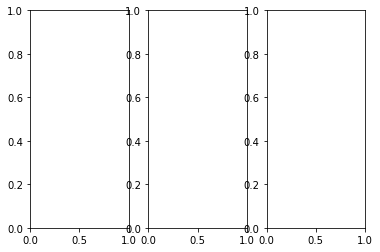

In [13]:
fig, axs = plt.subplots(1,3)
speed = input("Enter speed")
PATH = 'Cardio_Data/Cleaned_data/Apoorva/{}.csv'.format(speed)


devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = np.sqrt( np.square(devesh_df.Accel_LN_X_CAL) + 
                   np.square(devesh_df.Accel_LN_Y_CAL) +
                   np.square(devesh_df.Accel_LN_Z_CAL))
devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

# axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_X_CAL,color='red',label='x-axis')
# axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_Y_CAL, color='green',label='y-axis')
# axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_Z_CAL,color='blue',label='z-axis')
# axs[0].set_xlabel('Time')
# axs[0].set_ylabel('Amplitude')
# axs[0].set_title('Raw signal')
# axs[0].legend(loc='upper right')
axs[1].plot(np.linspace(0,3,1535),devesh_df['Resultant_Accel'], color='black')

axs[1].plot(np.linspace(0,3,1535),devesh_df['Resultant_Accel'], color='black')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Resultant Acceleration')

Abs_Amplitude = abs(   (np.fft.fft(devesh_df.Resultant_Accel)/len(devesh_df.Resultant_Accel))[range(int(len(devesh_df.Resultant_Accel)/8))]    )
  
Frequency =     np.fft.fftfreq(len(devesh_df.Resultant_Accel), d = 1/51.1)[range(int(len(devesh_df.Resultant_Accel)/8))]
axs[2].plot(Frequency, 
            Abs_Amplitude, 
            color='black'
            )
peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[2].set_xlabel('Frequency (Hertz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Fast Fourier Transforms')

#signal Amplitude
fig.set_size_inches(w=18,h=6)
ratio = 0
max_freq_index = 0
min_freq_index = 0
#peaks = np.array([p for p in peaks if (Abs_Amplitude[p] > 0.45) & (Abs_Amplitude[p] < 3.1)])
# %matplotlib inline


print(scatter_X)


In [ ]:
PATH = 'Cardio_Data/Cleaned_data/Apoorva/{}.csv'.format(speed)
plt.figure(figsize =(6,3))
devesh_df = pd.read_csv(PATH)#[300:450]
plt.figure(figsize =(15,5))

devesh_df['Resultant_Accel'] = np.sqrt( np.square(devesh_df.Accel_LN_X_CAL) + 
                   np.square(devesh_df.Accel_LN_Y_CAL) +
                   np.square(devesh_df.Accel_LN_Z_CAL))
devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

#plt.plot(np.linspace(0,3,150),devesh_df.Resultant_Accel,color='tab:orange',label='x-axis')

plt.plot(np.linspace(0,30,1535),devesh_df.Accel_LN_Z_CAL,color='tab:red',label='x-axis',linewidth = 1)
# plt.plot(np.linspace(0,3,150),devesh_df.Gyro_Y_CAL, color='green',label='y-axis')
# plt.plot(np.linspace(0,3,150),devesh_df.Gyro_Z_CAL,color='blue',label='z-axis')


plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Z-axis acceleration while running at 4.0 mph')
plt.tight_layout()
#plt.savefig('sine.jpg')
plt.show()

%matplotlib inline

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [ ]:
t = np.linspace(0, 1, 1000, False)  # 1 second

#sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
sig = devesh_df.Resultant_Accel[0:1000]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
#ax1.axis([0, 1, -2, 2])

sos = signal.butter(1, Wn=[1,20], btype='bandpass', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
#ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [14]:

# fig, axs = plt.subplots(1,3)
# speed = input("Enter speed")
# PATH = 'Cardio_Data/Cleaned_data/Apoorva/{}.csv'.format(speed)


# devesh_df = pd.read_csv(PATH)[1535]

# devesh_df['Resultant_Accel'] = np.sqrt( np.square(devesh_df.Accel_LN_X_CAL) + 
#                    np.square(devesh_df.Accel_LN_Y_CAL) +
#                    np.square(devesh_df.Accel_LN_Z_CAL))
# devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

# # axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_X_CAL,color='red',label='x-axis')
# # axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_Y_CAL, color='green',label='y-axis')
# # axs[0].plot(np.linspace(0,3,150),devesh_df.Accel_LN_Z_CAL,color='blue',label='z-axis')
# # axs[0].set_xlabel('Time')
# # axs[0].set_ylabel('Amplitude')
# # axs[0].set_title('Raw signal')
# # axs[0].legend(loc='upper right')
# axs[1].plot(np.linspace(0,20,1000),devesh_df['Resultant_Accel'], color='black')

# axs[1].plot(np.linspace(0,20,1000),devesh_df['Resultant_Accel'], color='black')
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Amplitude')
# axs[1].set_title('Resultant Acceleration')


Abs_Amplitude = abs(   (np.fft.fft(filtered)/len(filtered))[range(int(len(filtered)/8))]    )
  
Frequency =     np.fft.fftfreq(len(filtered), d = 1/51.1)[range(int(len(filtered)/8))]
axs[2].plot(Frequency, 
            Abs_Amplitude, 
            color='black'
            )
peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[2].set_xlabel('Frequency (Hertz)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Fast Fourier Transforms')

#signal Amplitude
fig.set_size_inches(w=18,h=6)
ratio = 0
max_freq_index = 0
min_freq_index = 0
#peaks = np.array([p for p in peaks if (Abs_Amplitude[p] > 0.45) & (Abs_Amplitude[p] < 3.1)])
# %matplotlib inline


print(scatter_X)


NameError: name 'filtered' is not defined

In [15]:
## PATH = 'Cardio_Data/Cleaned_data/Krithin/4.0.csv'
plt.figure(figsize =(6,3))
devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = np.sqrt( np.square(devesh_df.Accel_LN_X_CAL) + 
                   np.square(devesh_df.Accel_LN_Y_CAL) +
                   np.square(devesh_df.Accel_LN_Z_CAL))
devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

#plt.plot(np.linspace(0,3,150),devesh_df.Resultant_Accel,color='tab:orange',label='x-axis')

plt.plot(np.linspace(0,30,1535),devesh_df.Accel_LN_Z_CAL,color='tab:red',label='x-axis',linewidth = 1)
# plt.plot(np.linspace(0,3,150),devesh_df.Gyro_Y_CAL, color='green',label='y-axis')
# plt.plot(np.linspace(0,3,150),devesh_df.Gyro_Z_CAL,color='blue',label='z-axis')


plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Z-axis acceleration while running at 4.0 mph')
plt.tight_layout()
plt.savefig('sine.jpg')

plt.show()

%matplotlib inline

FileNotFoundError: [Errno 2] File Cardio_Data/Cleaned_data/Apoorva/.csv does not exist: 'Cardio_Data/Cleaned_data/Apoorva/.csv'

<Figure size 432x216 with 0 Axes>

FileNotFoundError: [Errno 2] File Cardio_Data/Cleaned_data/Sudeep/7.0.csv does not exist: 'Cardio_Data/Cleaned_data/Sudeep/7.0.csv'

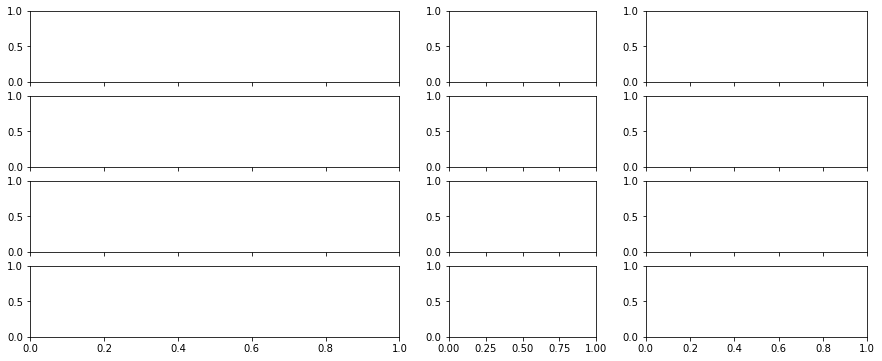

In [16]:
fig, axs = plt.subplots(4,3,sharex = 'col',squeeze = True, gridspec_kw={'width_ratios': [2.5, 1,1.5]})
fig.set_size_inches(w = 15, h = 6)
PATH = 'Cardio_Data/Cleaned_data/Sudeep/7.0.csv'

devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

Abs_Amplitude = abs(   (np.fft.fft(devesh_df.Resultant_Accel)/len(devesh_df.Resultant_Accel))[range(int(len(devesh_df.Resultant_Accel)/12))]    )

Frequency = np.fft.fftfreq(len(devesh_df.Resultant_Accel), d = 1/51.1)[range(int(len(devesh_df.Resultant_Accel)/12))]

peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

axs[0,2].plot(Frequency, 
            Abs_Amplitude, 
            color='#0d2f52')

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[0,2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[0,2].legend(loc='upper right',framealpha = 0.25, fontsize = 14)
axs[0,2].set_yticks([0,2,4,6,8,10])

axs[0,0].plot( np.linspace(0,30,1535),devesh_df['Resultant_Accel'],           
            color='#87c1de')

#################################################
PATH = 'Cardio_Data/Cleaned_data/Sudeep/4.0.csv'

devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

Abs_Amplitude = abs(   (np.fft.fft(devesh_df.Resultant_Accel)/len(devesh_df.Resultant_Accel))[range(int(len(devesh_df.Resultant_Accel)/12))]    )

Frequency =     np.fft.fftfreq(len(devesh_df.Resultant_Accel), d = 1/51.1)[range(int(len(devesh_df.Resultant_Accel)/12))]

peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

axs[1,2].plot(Frequency, 
            Abs_Amplitude, 
            color='#0d2f52')
          #  ,label= 'Fast Fourier \n Transform')

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[1,2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[1,2].legend(loc='best', fontsize = 14,framealpha = 0.25)
axs[1,2].set_yticks([1,2,3,4])
axs[1,0].plot( np.linspace(0,30,1535),devesh_df['Resultant_Accel'],            
            color='#87c1de')

#axs[0,0].set_ylabel('Amplitude')

#################################################################################
##################################################################################

PATH = 'Cardio_Data/Cleaned_data/Devesh/7.0.csv'

devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

Abs_Amplitude = abs(   (np.fft.fft(devesh_df.Resultant_Accel)/len(devesh_df.Resultant_Accel))[range(int(len(devesh_df.Resultant_Accel)/12))]    )

Frequency =     np.fft.fftfreq(len(devesh_df.Resultant_Accel), d = 1/51.1)[range(int(len(devesh_df.Resultant_Accel)/12))]

peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

axs[2,2].plot(Frequency, 
            Abs_Amplitude, 
            color='#0d2f52')

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[2,2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[2,2].legend(loc='upper right',framealpha = 0.25, fontsize = 14)
axs[2,2].set_yticks([0,2,4,6,8])

axs[2,0].plot( np.linspace(0,30,1535),devesh_df['Resultant_Accel'],            
            color='#87c1de')

#################################################
PATH = 'Cardio_Data/Cleaned_data/Devesh/4.0.csv'

devesh_df = pd.read_csv(PATH)

devesh_df['Resultant_Accel'] = devesh_df['Resultant_Accel'] - np.mean(devesh_df['Resultant_Accel'])

Abs_Amplitude = abs(   (np.fft.fft(devesh_df.Resultant_Accel)/len(devesh_df.Resultant_Accel))[range(int(len(devesh_df.Resultant_Accel)/12))]    )

Frequency =     np.fft.fftfreq(len(devesh_df.Resultant_Accel), d = 1/51.1)[range(int(len(devesh_df.Resultant_Accel)/12))]

peaks,_ = find_peaks(Abs_Amplitude)

higher_class_freqs = Abs_Amplitude[peaks].argsort()[-1:]

axs[3,2].plot(Frequency, 
            Abs_Amplitude, 
            color='#0d2f52')
         

scatter_X = Frequency[peaks[higher_class_freqs[0]]]
scatter_y = Abs_Amplitude[peaks[higher_class_freqs[0]]]
axs[3,2].scatter(scatter_X,scatter_y,marker = 'X',
                      s = 75,label = 'Cadence: {}'.format(np.round(scatter_X,2)),
                 color = '#e41a1c')
axs[3,2].set_xlabel('Frequency', fontsize = 14)
axs[3,2].legend(loc='best', fontsize = 14,framealpha = 0.25)
axs[3,2].set_yticks([0,1,2,3,4])
axs[3,0].plot( np.linspace(0,30,1535),devesh_df['Resultant_Accel'],            
            color='#87c1de')
axs[3,0].set_xlabel('Time', fontsize = 14)

################################################################################################################
############################################################################################

def splines_off(ax):
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

from matplotlib.ticker import MaxNLocator
axs[0,2].yaxis.set_major_locator(MaxNLocator(prune='upper', nbins = 5))
axs[1,2].yaxis.set_major_locator(MaxNLocator(prune='upper', nbins = 3))
axs[2,2].yaxis.set_major_locator(MaxNLocator(prune='upper', nbins = 3))
axs[3,2].yaxis.set_major_locator(MaxNLocator(prune='upper', nbins = 6))


axs[0,1].text(0.1,0.3,'Total peaks : {}\n Person ID : 1 \n Speed : 4.0mph'.format(74), fontsize = 14)
axs[0,1] = splines_off(axs[0,1])

axs[1,1].text(0.1,0.3,'Total peaks : {}\n Person ID : 1 \n Speed : 4.0mph'.format(62), fontsize = 14)
axs[1,1] = splines_off(axs[1,1])

axs[2,1].text(0.1,0.3,'Total peaks : {}\n Person ID : 2 \n Speed : 4.0mph'.format(83), fontsize = 14)
axs[2,1] = splines_off(axs[2,1])

axs[3,1].text(0.1,0.3,'Total peaks : {}\n Person ID : 2 \n Speed : 4.0mph'.format(60), fontsize = 14)
axs[3,1] = splines_off(axs[3,1])

fig.subplots_adjust(hspace=0 , wspace = 0.1)

fig.text(0.09, 0.5, 'Amplitude', va='center', fontsize = 14, rotation='vertical')
plt.savefig('fft_eval.pdf')
plt.show()
%matplotlib inline

# Evaluation of Cadence